In [1]:
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# https://www.youtube.com/watch?v=QIUxPv5PJOY

def format_data(df,start, end):
    training_data = df[start:end].drop('Date', axis = 1)
    return(training_data)
        
def create_xy_scaled(df, samples):
    
    dataset = df.values
    scaler = MinMaxScaler(feature_range = (0,1))
    scaled_data = scaler.fit_transform(dataset)
    data = scaled_data
    x = []
    y = []

    for i in range(samples, len(df)):
        x.append(data[i-samples:i])
        y.append(data[i])
        
    return(np.array(x), np.array(y), scaler)



In [10]:
df = pd.read_csv('dataset_QQQ_9_20140207_to_20181231.csv')
df.drop('Date', axis =1, inplace = True)
df.drop('RSI_Correlation', axis = 1, inplace = True)
samples = 100


x = create_xy_scaled(df,samples)[0]
y = create_xy_scaled(df, samples)[1]
scale = create_xy_scaled(df,samples)[2]
x_train = x[:1000].copy()
y_train = y[:1000].copy()

x_test = x[1001:].copy()
y_test = y[1001:].copy()

In [12]:
df

,Close,RSI,12 EMA,26 EMA,pct change,volatility,bol_band_upper,bol_band_lower
0,87.300003,49.544463,85.871403,86.778077,0.017838,15.290000,89.579778,83.875223
1,87.800003,59.932334,86.091188,86.816738,0.005727,15.260000,89.634517,83.870485
2,88.800003,62.751712,86.354082,86.889573,0.011390,14.510000,89.890433,83.893568
3,88.970001,67.842895,86.730378,87.031086,0.001914,14.300000,90.082159,83.833842
4,89.629997,68.662075,87.074935,87.174709,0.007418,14.140000,90.311438,83.730562
...,...,...,...,...,...,...,...,...
1228,143.500000,20.293179,158.105234,162.140609,-0.027580,36.070000,176.308653,146.743347
1229,152.460007,20.293179,155.858275,160.759823,0.062439,30.410000,176.311155,145.697846
1230,153.050003,44.134143,155.335465,160.145022,0.003870,29.959999,176.144803,144.825198
1231,152.970001,45.212265,154.983855,159.619465,-0.000523,28.340000,175.200332,144.196670


In [ ]:
hyparam ={'loss':'mean_squared_error',
         'opt':'Adam',
         'epochs': 10,
         'batch_size':8}

regressor = Sequential()

regressor.add(LSTM(units = 16, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 16, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 64, activation = 'relu',))
regressor.add(Dropout(0.4))

regressor.add(Dense(units=y_train.shape[1]))

regressor.compile(optimizer = hyparam['opt'], loss = hyparam['loss'])

regressor.fit(x_train, y_train, epochs = hyparam['epochs'], batch_size = hyparam['batch_size'])

In [13]:
hyparam ={'loss':'mean_squared_error',
         'opt':'Adam',
         'epochs': 10,
         'batch_size':8}

regressor = Sequential()

regressor.add(LSTM(units = 16, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 16, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 64, activation = 'relu',))
regressor.add(Dropout(0.4))

regressor.add(Dense(units=y_train.shape[1]))

regressor.compile(optimizer = hyparam['opt'], loss = hyparam['loss'])

regressor.fit(x_train, y_train, epochs = hyparam['epochs'], batch_size = hyparam['batch_size'])

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 22s 22ms/sample - loss: 0.0458
Epoch 2/10
1000/1000 [==============================] - 16s 16ms/sample - loss: 0.0195
Epoch 3/10
1000/1000 [==============================] - 17s 17ms/sample - loss: 0.0171
Epoch 4/10
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.0153
Epoch 5/10
1000/1000 [==============================] - 17s 17ms/sample - loss: 0.0130
Epoch 6/10
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.0131
Epoch 7/10
1000/1000 [==============================] - 19s 19ms/sample - loss: 0.0123
Epoch 8/10
1000/1000 [==============================] - 19s 19ms/sample - loss: 0.0108
Epoch 9/10
1000/1000 [==============================] - 19s 19ms/sample - loss: 0.0117
Epoch 10/10
1000/1000 [==============================] - 19s 19ms/sample - loss: 0.0107


In [16]:
regressor.save('2020-06-28-1-regressor.model')

array([[0.78832674, 0.6244377 , 0.77726763, ..., 0.16059764, 0.7775438 ,
        0.75736016],
       [0.79088545, 0.6244083 , 0.78004014, ..., 0.16161305, 0.78057057,
        0.7597593 ],
       [0.79288507, 0.6240249 , 0.78235376, ..., 0.16255248, 0.7830694 ,
        0.76165855],
       ...,
       [0.7306477 , 0.5869248 , 0.7303314 , ..., 0.16292782, 0.7280076 ,
        0.7071139 ],
       [0.72652507, 0.58494985, 0.7268104 , ..., 0.16268033, 0.7241317 ,
        0.7035445 ],
       [0.72192895, 0.58287656, 0.72279525, ..., 0.16237491, 0.7197611 ,
        0.6995466 ]], dtype=float32)

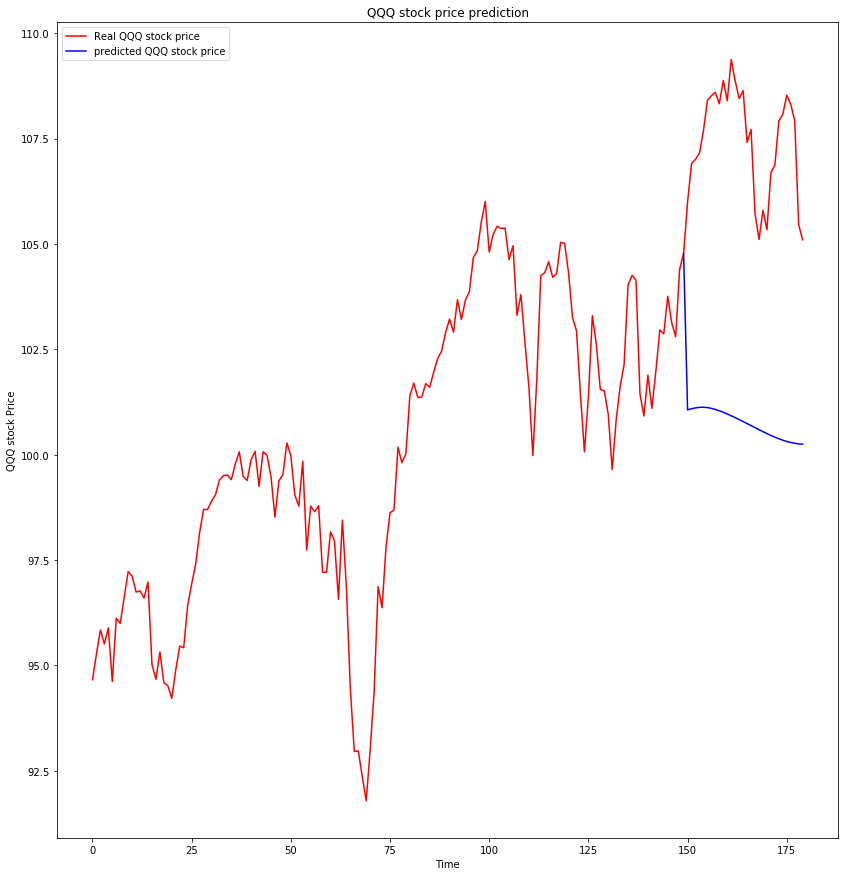

In [8]:
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
%matplotlib inline

# https://www.youtube.com/watch?v=QIUxPv5PJOY

def format_data(df,start, end):
    training_data = df[start:end].drop('Date', axis = 1)
    return(training_data)
        
def create_xy_scaled(df, samples):
    
    dataset = df.values
    scaler = MinMaxScaler(feature_range = (0,1))
    scaled_data = scaler.fit_transform(dataset)
    data = scaled_data
    x = []
    y = []

    for i in range(samples, len(df)):
        x.append(data[i-samples:i])
        y.append(data[i])
        
    return(np.array(x), np.array(y), scaler)

#returns list of RSI values over n periods
def RSI(df, n):
    L = len(df)
    up = [0]*L
    down = [0]*L
    
    for i in range(1,L):
        if df['Close'][i-1] <= df['Close'][i]:
            up[i] = df['Close'][i] - df['Close'][i-1]
        if df['Close'][i-1] > df['Close'][i]:
            down[i] = abs(df['Close'][i] - df['Close'][i-1])

    avg_up= [0]*L
    avg_down = [0]*L
    
    avg_up[n] = np.mean(up[1:n+1])
    avg_down[n] = np.mean(down[1:n+1])
    
    for i in range(n+1,L):
        avg_up[i] = (avg_up[i-1]*(n-1)+up[i])/n
        avg_down[i] = (avg_down[i-1]*(n-1)+down[i])/n
    
    #return(avg_up,avg_down)
    RSI = [0]*L
    for i in range(n,L):
        RSI[i]= 100 - 100/(1+ (avg_up[i-1]/avg_down[i]))
    
    return(RSI)


##SMA, returns list of simple moving average over n periods
def SMA(stock_df,n):
    A = [0]*len(stock_df)
    for i in range(len(stock_df)-n+1):
        A[i+n-1] = np.mean(list(stock_df['Close'][i:i+n]))
    return(A)

#EMA, returns list of exponential moving average over n periods
def EMA(stock_df,n):
    mult = 2/(n+1)
    A = [0]*len(stock_df)
    A[n-1] = SMA(stock_df,n)[n-1]
    for i in range(n-1,len(stock_df)-1):
        A[i+1] = A[i]+(stock_df['Close'][i]-A[i])*mult
    return(A)

def unscale(data, scaler):
    return(scaler.inverse_transform(data))

def rescale(data, scaler):
    return(scaler.transform(data))

def pred(x, model):
    return(model.predict(x))

def pred(x, model):
    x = x.reshape(1, x.shape[0], x.shape[1])
    return(model.predict(x))

def make_new_row(df_columns, values):
    new_row = {}
    for i in range(len(values)):
        new_row[df_columns[i]] = values[i]
    return(new_row)

model = tf.keras.models.load_model('2020-06-25-2-regressor.model')
QQQ = pd.read_csv('dataset_QQQ_20140207_to_20181231.csv')

QQQ.drop('Date', axis =1, inplace = True)
samples = 100
scale = create_xy_scaled(QQQ,samples)[2]


forecast = 30
start = 105
end = start + 150
df = QQQ[start:end]
df_test = QQQ[start:end+forecast].reset_index(drop = True)

for i in range(forecast):
    input = scale.transform(df[-samples:])
    new_row_values = unscale(pred(input[-samples:], model), scale)
    df = df.append(make_new_row(df.columns, new_row_values[0]), ignore_index = True)
    df[' 9 RSI'] = RSI(df, 9)
    df['12 EMA'] = EMA(df, 12)
    df['26 EMA'] = EMA(df, 26)
    

df_out = df[-forecast-1:].copy()

actual = df_test['Close']
pred = df_out['Close']

plt.figure(figsize = (14,15))
plt.plot(actual, color = 'red', label = 'Real QQQ stock price')
plt.plot(pred, color = 'blue', label = 'predicted QQQ stock price')
plt.title('QQQ stock price prediction')
plt.xlabel('Time')
plt.ylabel('QQQ stock Price')
plt.legend()
plt.show()

In [1]:
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
%matplotlib inline

# https://www.youtube.com/watch?v=QIUxPv5PJOY

def format_data(df,start, end):
    training_data = df[start:end].drop('Date', axis = 1)
    return(training_data)
        
def create_xy_scaled(df, samples):
    
    dataset = df.values
    scaler = MinMaxScaler(feature_range = (0,1))
    scaled_data = scaler.fit_transform(dataset)
    data = scaled_data
    x = []
    y = []

    for i in range(samples, len(df)):
        x.append(data[i-samples:i])
        y.append(data[i])
        
    return(np.array(x), np.array(y), scaler)

#returns list of RSI values over n periods
def RSI(df, n):
    L = len(df)
    up = [0]*L
    down = [0]*L
    
    for i in range(1,L):
        if df['Close'][i-1] <= df['Close'][i]:
            up[i] = df['Close'][i] - df['Close'][i-1]
        if df['Close'][i-1] > df['Close'][i]:
            down[i] = abs(df['Close'][i] - df['Close'][i-1])

    avg_up= [0]*L
    avg_down = [0]*L
    
    avg_up[n] = np.mean(up[1:n+1])
    avg_down[n] = np.mean(down[1:n+1])
    
    for i in range(n+1,L):
        avg_up[i] = (avg_up[i-1]*(n-1)+up[i])/n
        avg_down[i] = (avg_down[i-1]*(n-1)+down[i])/n
    
    #return(avg_up,avg_down)
    RSI = [0]*L
    for i in range(n,L):
        RSI[i]= 100 - 100/(1+ (avg_up[i-1]/avg_down[i]))
    
    return(RSI)


##SMA, returns list of simple moving average over n periods
def SMA(stock_df,n):
    A = [0]*len(stock_df)
    for i in range(len(stock_df)-n+1):
        A[i+n-1] = np.mean(list(stock_df['Close'][i:i+n]))
    return(A)

#EMA, returns list of exponential moving average over n periods
def EMA(stock_df,n):
    mult = 2/(n+1)
    A = [0]*len(stock_df)
    A[n-1] = SMA(stock_df,n)[n-1]
    for i in range(n-1,len(stock_df)-1):
        A[i+1] = A[i]+(stock_df['Close'][i]-A[i])*mult
    return(A)

def close_price(stock_df):
    A = [0]*len(stock_df)
    for i in range(len(stock_df)-1):
        A[i+1] = stock_df['Close'][i]*(1+stock_df['pct change'][i])
    return(A)


def unscale(data, scaler):
    return(scaler.inverse_transform(data))

def rescale(data, scaler):
    return(scaler.transform(data))

def pred(x, model):
    return(model.predict(x))

def pred(x, model):
    x = x.reshape(1, x.shape[0], x.shape[1])
    return(model.predict(x))

def make_new_row(df_columns, values):
    new_row = {}
    for i in range(len(values)):
        new_row[df_columns[i]] = values[i]
    return(new_row)

c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\pytho

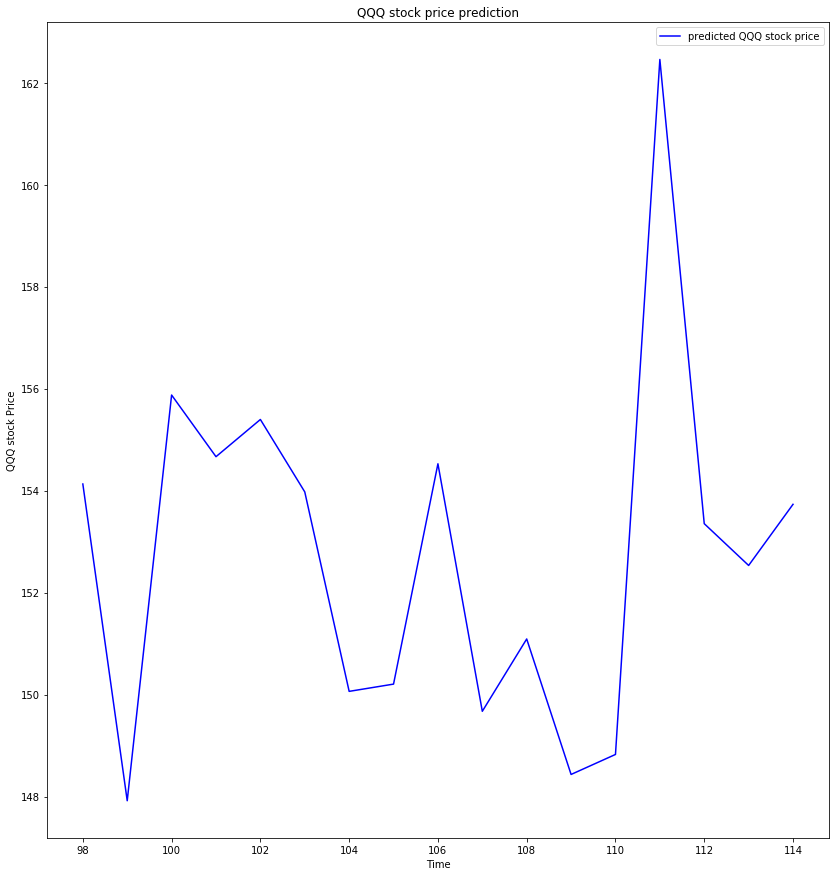

In [2]:
model = tf.keras.models.load_model('2020-06-27-1-regressor.model')
QQQ = pd.read_csv('dataset_QQQ_pct_20140207_to_20181231.csv')

QQQ.drop('Date', axis =1, inplace = True)
samples = 100
scale = create_xy_scaled(QQQ,samples)[2]


forecast = 15
#start = 1100
#end = start + 100
df = QQQ[-100:]
#df_test = QQQ[start:end+forecast].reset_index(drop = True)

for i in range(forecast):
    input = rescale(df[-samples:], scale)
    new_row_values = unscale(pred(input[-samples:], model), scale)
    df = df.append(make_new_row(df.columns, new_row_values[0]), ignore_index = True)
    df['RSI'] = RSI(df, 9)
    df['12 EMA'] = EMA(df, 12)
    df['26 EMA'] = EMA(df, 26)
    df['Close'] = close_price(df)
    

df_out = df[-forecast-2:].copy()

#actual = df_test['Close']
pred = df_out['Close']

plt.figure(figsize = (14,15))
#plt.plot(actual, color = 'red', label = 'Real QQQ stock price')
plt.plot(pred, color = 'blue', label = 'predicted QQQ stock price')
plt.title('QQQ stock price prediction')
plt.xlabel('Time')
plt.ylabel('QQQ stock Price')
plt.legend()
plt.show()

c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
c:\users\olfoa\appdata\local\programs\python\pytho

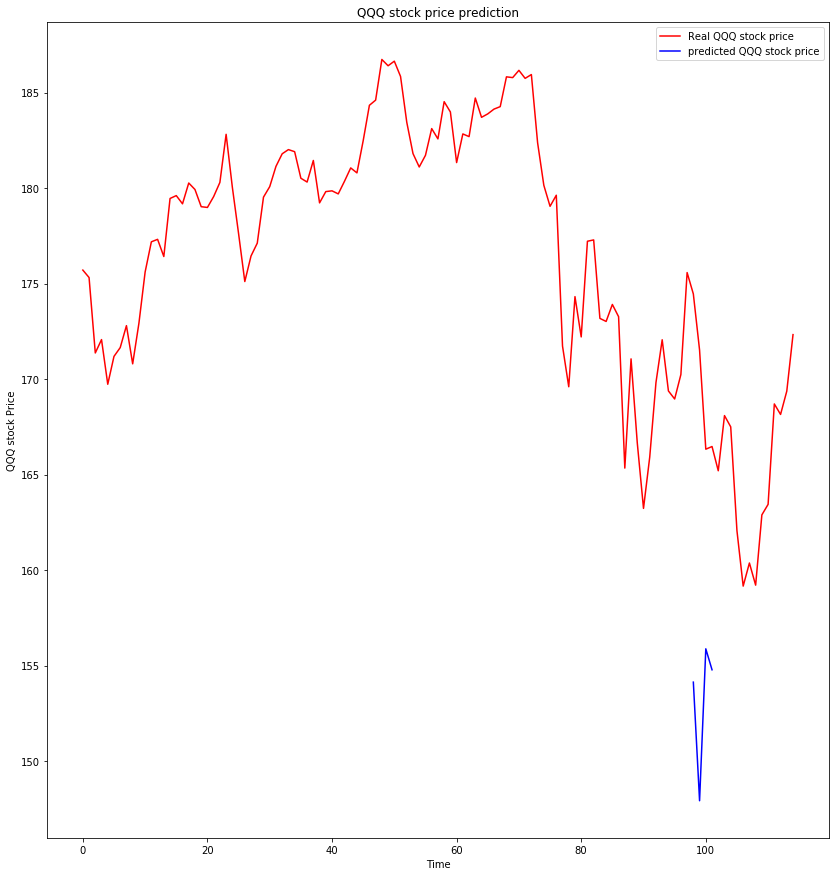

In [6]:
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
%matplotlib inline

import pandas_datareader.data as web
import datetime as dt
start = dt.datetime(2014,1,1)
end = dt.datetime(2019,1,1)
def ticker_df(ticker, start, end):
    source = 'yahoo'
    df = web.DataReader(ticker, source, start, end)
    return df.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis = 1)
VIX = ticker_df('^VIX', start, end)

# https://www.youtube.com/watch?v=QIUxPv5PJOY

def format_data(df,start, end):
    training_data = df[start:end].drop('Date', axis = 1)
    return(training_data)
        
def create_xy_scaled(df, samples):
    
    dataset = df.values
    scaler = MinMaxScaler(feature_range = (0,1))
    scaled_data = scaler.fit_transform(dataset)
    data = scaled_data
    x = []
    y = []

    for i in range(samples, len(df)):
        x.append(data[i-samples:i])
        y.append(data[i])
        
    return(np.array(x), np.array(y), scaler)

#returns list of RSI values over n periods
def RSI(df, n):
    L = len(df)
    up = [0]*L
    down = [0]*L
    
    for i in range(1,L):
        if df['Close'][i-1] <= df['Close'][i]:
            up[i] = df['Close'][i] - df['Close'][i-1]
        if df['Close'][i-1] > df['Close'][i]:
            down[i] = abs(df['Close'][i] - df['Close'][i-1])

    avg_up= [0]*L
    avg_down = [0]*L
    
    avg_up[n] = np.mean(up[1:n+1])
    avg_down[n] = np.mean(down[1:n+1])
    
    for i in range(n+1,L):
        avg_up[i] = (avg_up[i-1]*(n-1)+up[i])/n
        avg_down[i] = (avg_down[i-1]*(n-1)+down[i])/n
    
    #return(avg_up,avg_down)
    RSI = [0]*L
    for i in range(n,L):
        RSI[i]= 100 - 100/(1+ (avg_up[i-1]/avg_down[i]))
    
    return(RSI)


##SMA, returns list of simple moving average over n periods
def SMA(stock_df,n):
    A = [0]*len(stock_df)
    for i in range(len(stock_df)-n+1):
        A[i+n-1] = np.mean(list(stock_df['Close'][i:i+n]))
    return(A)

#EMA, returns list of exponential moving average over n periods
def EMA(stock_df,n):
    mult = 2/(n+1)
    A = [0]*len(stock_df)
    A[n-1] = SMA(stock_df,n)[n-1]
    for i in range(n-1,len(stock_df)-1):
        A[i+1] = A[i]+(stock_df['Close'][i]-A[i])*mult
    return(A)

def close_price(stock_df):
    A = [0]*len(stock_df)
    for i in range(len(stock_df)-1):
        A[i+1] = stock_df['Close'][i]*(1+stock_df['pct change'][i])
    return(A)

def bol_bands(stock_df, n):
    L = len(stock_df)
    price = list(stock_df['Close'])
    std_dev = list(stock_df['Close'].rolling(window = n).std())
    mean = list(stock_df['Close'].rolling(window = n).mean())
    upper_band = [0]*L
    lower_band = [0]*L
    
    for i in range(L):
        upper_band[i] = mean[i] + 2*std_dev[i]
        lower_band[i] = mean[i] - 2*std_dev[i]
    
    return(upper_band, lower_band)

def RSI_corr_pct(stock_df):
    close_pct_change = pct_change(stock_df, 'Close')
    RSI_pct_change = pct_change(stock_df, 'RSI')
    RSI_corr = [0]*len(stock_df)
    for i in range(len(RSI_corr)):
        try:
            RSI_corr[i] = close_pct_change[i]/RSI_pct_change[i]
        except:
            pass
        
        if RSI_corr[i]>0.99:
            RSI_corr[i] = 1
        if RSI_corr[i]<-0.99:
            RSI_corr[i] = -1

def unscale(data, scaler):
    return(scaler.inverse_transform(data))

def rescale(data, scaler):
    return(scaler.transform(data))

def pred(x, model):
    return(model.predict(x))

def pred(x, model):
    x = x.reshape(1, x.shape[0], x.shape[1])
    return(model.predict(x))

def make_new_row(df_columns, values):
    new_row = {}
    for i in range(len(values)):
        new_row[df_columns[i]] = values[i]
    return(new_row)

## execution text

model = tf.keras.models.load_model('2020-06-28-1-regressor.model')
QQQ = pd.read_csv('dataset_QQQ_9_20140207_to_20181231.csv')

QQQ.drop('Date', axis =1, inplace = True)
QQQ.drop('RSI_Correlation', axis = 1, inplace = True)
samples = 100
scale = create_xy_scaled(QQQ,samples)[2]


forecast = 15
start = 1100
end = start + 100
df = QQQ[-100:]
df_test = QQQ[start:end+forecast].reset_index(drop = True)

for i in range(forecast):
    input = rescale(df[-samples:], scale)
    new_row_values = unscale(pred(input[-samples:], model), scale)
    df = df.append(make_new_row(df.columns, new_row_values[0]), ignore_index = True)
    df['RSI'] = RSI(df, 9)
    df['12 EMA'] = EMA(df, 12)
    df['26 EMA'] = EMA(df, 26)
    df['Close'] = close_price(df)
    #df['volatility'] = VIX['Close']
    #stock_df['RSI_Correlation'] = RSI_corr_pct(QQQ)
    df['bol_band_upper'] = bol_bands(df,20)[0]
    df['bol_band_lower'] = bol_bands(df,20)[1]

df_out = df[-(forecast+2):].copy()

actual = df_test['Close']
pred = df_out['Close']

plt.figure(figsize = (14,15))
plt.plot(actual, color = 'red', label = 'Real QQQ stock price')
plt.plot(pred, color = 'blue', label = 'predicted QQQ stock price')
plt.title('QQQ stock price prediction')
plt.xlabel('Time')
plt.ylabel('QQQ stock Price')
plt.legend()
plt.show()

In [7]:
df

,Close,RSI,12 EMA,26 EMA,pct change,volatility,bol_band_upper,bol_band_lower
0,0.0,0.00000,0.0,0.0,0.001210,10.85,NaN,NaN
1,0.0,0.00000,0.0,0.0,-0.000604,11.27,NaN,NaN
2,0.0,0.00000,0.0,0.0,-0.007641,13.16,NaN,NaN
3,0.0,0.00000,0.0,0.0,-0.001108,14.78,NaN,NaN
4,0.0,0.00000,0.0,0.0,0.006267,13.31,NaN,NaN
...,...,...,...,...,...,...,...,...
110,NaN,52.46987,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,52.46987,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,52.46987,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,52.46987,NaN,NaN,NaN,NaN,NaN,NaN
